In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the csv file
df = pd.read_csv("fake_or_real_news_2.csv")
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [3]:
df["label"].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

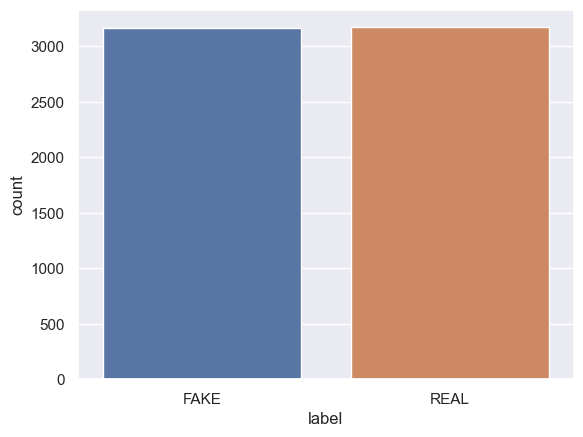

In [4]:
sns.set()
sns.countplot(x="label", data=df)

In [5]:
# Finding missing values
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [6]:
# Finding duplicates value
df.duplicated().sum()

0

In [7]:
# Label encoding for "label" column
df["category"] = df["label"].replace({"REAL":0, "FAKE":1})
df

,Unnamed: 0,title,text,label,category
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,1
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,1
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,0
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,1
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,0
...,...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL,0
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE,1
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE,1
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL,0


# Spacy word vectors

In [8]:
import spacy

nlp = spacy.load("en_core_web_lg")

In [9]:
df["vetorized_text"] = df["text"].apply(lambda x: nlp(x).vector)
df

,Unnamed: 0,title,text,label,category,vetorized_text
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,1,"[-1.3751823, 1.3421849, -2.3666484, 0.12908486..."
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,1,"[-1.7449774, 0.93961924, -2.024867, 0.42536643..."
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,0,"[-1.9426425, 1.0062195, -1.9992222, 0.20469022..."
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,1,"[-1.9125352, -0.1481846, -1.1432766, 0.6861217..."
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,0,"[-1.8516092, 1.3163909, -2.1726575, 1.2286776,..."
...,...,...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL,0,"[-1.556691, 0.60453945, -1.1016529, 0.16134764..."
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE,1,"[-2.206026, -0.12085343, -1.0834901, 0.6655213..."
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE,1,"[-2.558132, 0.47698027, -1.8662019, 0.8344748,..."
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL,0,"[-1.8501893, 0.6893597, -1.9594386, 0.41594952..."


In [14]:
# splitting the datasets into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df["vetorized_text"].values, df["category"], test_size=0.20, stratify=df['category'], random_state=2023)

In [15]:
print(df["vetorized_text"].shape, x_train.shape, x_test.shape)

(6335,) (5068,) (1267,)


In [17]:
x_train

array([array([-0.40887675,  0.37702817, -1.68984   ,  0.40287876,  3.6050832 ,
              -0.05200028, -0.22040941,  2.5375674 , -0.19279009,  0.09304537,
               3.1457405 ,  1.5905595 , -2.645005  ,  1.7855107 ,  0.8074945 ,
               1.218203  ,  0.7339727 , -0.2899439 , -0.8765857 , -1.0831043 ,
               0.42351267, -0.06655625,  0.32865864,  0.01634631, -0.27362874,
              -0.8342576 , -2.075505  ,  0.1576419 , -0.22068979,  0.42866117,
               0.74713683, -0.23137566,  0.01063291, -1.3072405 , -1.3630104 ,
              -0.78280485, -0.14738768,  0.22240268,  0.39264038, -0.13677683,
               1.1670957 , -0.2096186 ,  0.0760613 ,  0.5704469 , -0.85799384,
               1.0201476 ,  0.12683043, -1.8242661 ,  0.16997062,  0.7612945 ,
              -0.5450102 ,  0.48913628, -0.35593948, -3.3440185 , -0.73514867,
               0.71678036, -0.6594896 , -0.23123215,  0.6157619 ,  0.13809486,
              -0.8915105 , -0.43289164,  0.05730945,

In [18]:
x_train.ndim

1

# Scikit_learn Model expects 2D x_train and x_test

In [19]:
# Converting 1D to 2D
x_train_2d = np.stack(x_train)
x_test_2d = np.stack(x_test)

In [20]:
x_train_2d

array([[-0.40887675,  0.37702817, -1.68984   , ..., -0.8863633 ,
        -2.363007  ,  0.0318155 ],
       [-2.5802662 ,  0.57145655, -1.7042542 , ..., -1.2939266 ,
        -2.0459073 ,  0.9163959 ],
       [-1.7950878 ,  0.8105019 , -2.38934   , ..., -1.1849973 ,
        -2.734741  ,  1.2729874 ],
       ...,
       [-1.6814642 ,  0.15683609, -1.3219042 , ..., -1.5365556 ,
        -1.2449412 ,  0.54306644],
       [-1.7226977 ,  0.3787662 , -2.2941341 , ..., -2.1728964 ,
        -2.4943867 ,  1.5259805 ],
       [-2.0182104 ,  1.0746562 , -1.6531684 , ..., -0.6359521 ,
        -2.2555766 ,  0.98825336]], dtype=float32)

In [21]:
x_train_2d.ndim

2

In [22]:
x_test_2d.ndim

2

In [ ]:
# Standardizing the data
from sklearn.preprocessing import MinMaxScaler

mns= MinMaxScaler()
x_train_scaled = mns.fit_transform(x_train_2d)
x_test_scaled = mns.transform(x_test_2d)

# Training the model to Multinomial Naive Bayes Model

In [27]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(x_train_scaled, y_train)

MultinomialNB()

In [28]:
# x_test prediction
y_pred = clf.predict(x_test_scaled)

In [29]:
# Classification Report
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.74      0.85      0.79       634
           1       0.83      0.70      0.76       633

    accuracy                           0.78      1267
   macro avg       0.78      0.77      0.77      1267
weighted avg       0.78      0.78      0.77      1267



<AxesSubplot:>

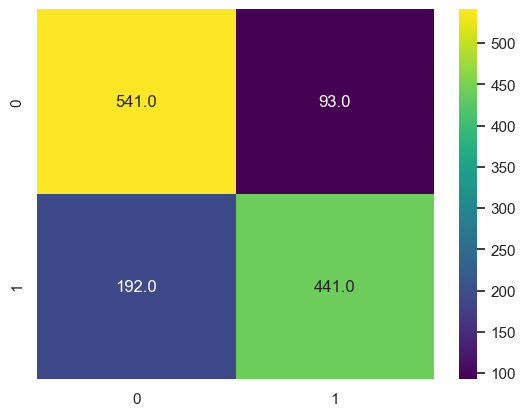

In [30]:
# Confusuion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Visualization
sns.set()
sns.heatmap(cm, fmt= ".1f", annot=True, cbar=True, cmap="viridis")

In [31]:
y_test[:5]

467     0
2240    1
4582    1
1682    1
178     0
Name: category, dtype: int64

In [32]:
y_pred[:5]

array([0, 1, 0, 1, 0], dtype=int64)

# Training the model to KNearestNeighbor Model

In [33]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(x_train_scaled, y_train)

KNeighborsClassifier()

In [34]:
# x_test prediction
y_pred = clf.predict(x_test_scaled)

In [35]:
# Classification Report
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       634
           1       0.88      0.73      0.80       633

    accuracy                           0.82      1267
   macro avg       0.83      0.82      0.82      1267
weighted avg       0.83      0.82      0.82      1267



<AxesSubplot:>

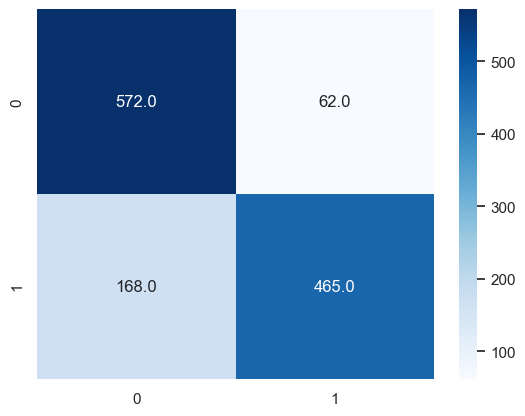

In [36]:
# Confusuion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Visualization
sns.set()
sns.heatmap(cm, fmt= ".1f", annot=True, cbar=True, cmap="Blues")

In [37]:
y_test[:5]

467     0
2240    1
4582    1
1682    1
178     0
Name: category, dtype: int64

In [38]:
y_pred[:5]

array([0, 0, 0, 1, 0], dtype=int64)

# Training the model to Random Forest Classifier Model

In [39]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_train_scaled, y_train)

RandomForestClassifier()

In [40]:
# x_test prediction
y_pred = clf.predict(x_test_scaled)

In [41]:
# Classification Report
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       634
           1       0.86      0.86      0.86       633

    accuracy                           0.86      1267
   macro avg       0.86      0.86      0.86      1267
weighted avg       0.86      0.86      0.86      1267



<AxesSubplot:>

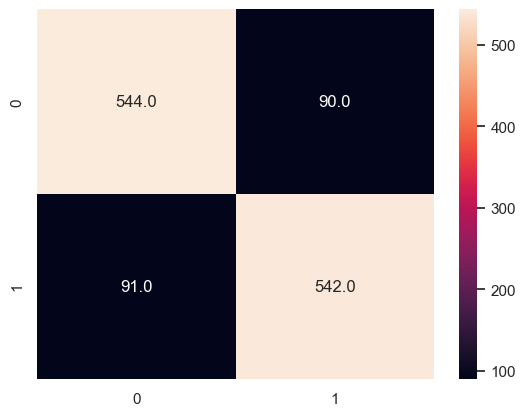

In [42]:
# Confusuion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Visualization
sns.set()
sns.heatmap(cm, fmt= ".1f", annot=True, cbar=True)

In [43]:
y_test[:5]

467     0
2240    1
4582    1
1682    1
178     0
Name: category, dtype: int64

In [44]:
y_pred[:5]

array([0, 1, 0, 1, 1], dtype=int64)